In [1]:
# Import modules
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)
import pandas as pd
from pathlib import Path
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.preprocessing import StandardScaler
import yellowbrick

In [8]:
# Read the CSV file into a Pandas DataFrame
credit_data_df = pd.read_csv(
    Path('cleaned_data_v2.csv')   
)

# Review the DataFrame
credit_data_df.head()

,Age,Occupation,Annual_Income,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,28,_______,34847.84,2,4,6,1,3,4,5.42,...,Good,605.03,24.46,26.6,No,18.82,104.29,Low_spent_Small_value_payments,470.69,Standard
1,28,Teacher,34847.84,2,4,6,1,7,1,7.42,...,Good,605.03,38.55,26.7,No,18.82,40.39,High_spent_Large_value_payments,484.59,Good
2,28,Teacher,34847.84,2,4,6,1,3,3,5.42,...,Good,605.03,39.18,26.8,No,18.82,99.31,Low_spent_Medium_value_payments,465.68,Good
3,28,Teacher,34847.84,2,4,6,1,3,1,6.42,...,Good,605.03,34.98,26.9,No,18.82,130.12,Low_spent_Small_value_payments,444.87,Good
4,28,Teacher,34847.84,2,4,6,1,3,0,5.42,...,Good,605.03,33.38,27.0,No,18.82,43.48,High_spent_Large_value_payments,481.51,Good


In [9]:
# rename columns for graph
credit_data_df.rename(columns={
    'Age': 'Age',
    'Occupation': 'Occupation',
    'Annual_Income': 'income',
    'Num_Bank_Accounts': '#bank',
    'Num_Credit_Card': '#cc',
    'Interest_Rate': 'int.rt',
    'Num_of_Loan': '#loan',
    'Delay_from_due_date': 'dfdd',
    'Num_of_Delayed_Payment': '#dp',
    'Changed_Credit_Limit': 'ccl',
    'Num_Credit_Inquiries': '#ci',
    'Credit_Mix': 'Credit_Mix',
    'Outstanding_Debt': 'debt',
    'Credit_Utilization_Ratio': 'CUR',
    'Credit_History_Age': 'CHA',
    'Payment_of_Min_Amount': 'Payment_of_Min_Amount',
    'Total_EMI_per_month': 'Total_EMI_per_month',
    'Amount_invested_monthly': 'AIM',
    'Payment_Behaviour': 'Payment_Behaviour',
    'Monthly_Balance': '20',
    'Credit_Score': 'Credit_Score'
}, inplace=True)


In [10]:
credit_data_df.drop(columns=['Occupation'], inplace=True)
credit_data_df.drop(columns=['Total_EMI_per_month'], inplace=True)
credit_data_df.drop(columns=['Payment_Behaviour'], inplace=True)
credit_data_df.drop(columns=['Payment_of_Min_Amount'], inplace=True)
credit_data_df.drop(columns=['Credit_Mix'], inplace=True)
credit_data_df.drop(columns=['20'], inplace=True)

# credit_data_df.drop(columns=['income'], inplace=True)
# credit_data_df.drop(columns=['#ci'], inplace=True)

credit_data_df

,Age,income,#bank,#cc,int.rt,#loan,dfdd,#dp,ccl,#ci,debt,CUR,CHA,AIM,Credit_Score
0,28,34847.84,2,4,6,1,3,4,5.42,2,605.03,24.46,26.6,104.29,Standard
1,28,34847.84,2,4,6,1,7,1,7.42,2,605.03,38.55,26.7,40.39,Good
2,28,34847.84,2,4,6,1,3,3,5.42,2,605.03,39.18,26.8,99.31,Good
3,28,34847.84,2,4,6,1,3,1,6.42,2,605.03,34.98,26.9,130.12,Good
4,28,34847.84,2,4,6,1,3,0,5.42,2,605.03,33.38,27.0,43.48,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35338,28,20002.88,10,8,29,5,33,25,18.31,9,3571.70,28.51,6.0,213.98,Standard
35339,29,20002.88,10,8,29,5,33,25,18.31,9,3571.70,37.14,6.2,34.66,Standard
35340,25,39628.99,4,6,7,2,20,6,9.50,3,502.38,39.32,31.4,140.58,Poor
35341,25,39628.99,4,6,7,2,23,7,11.50,3,502.38,34.66,31.5,60.97,Poor


In [11]:
# Seperate the features, X,  from the target variable, y
y = credit_data_df['Credit_Score']
X = credit_data_df.drop(columns='Credit_Score')

In [12]:
# Preview the features data
X.head()

,Age,income,#bank,#cc,int.rt,#loan,dfdd,#dp,ccl,#ci,debt,CUR,CHA,AIM
0,28,34847.84,2,4,6,1,3,4,5.42,2,605.03,24.46,26.6,104.29
1,28,34847.84,2,4,6,1,7,1,7.42,2,605.03,38.55,26.7,40.39
2,28,34847.84,2,4,6,1,3,3,5.42,2,605.03,39.18,26.8,99.31
3,28,34847.84,2,4,6,1,3,1,6.42,2,605.03,34.98,26.9,130.12
4,28,34847.84,2,4,6,1,3,0,5.42,2,605.03,33.38,27.0,43.48


In [8]:
# Encode the categorical variables using get_dummies
X = pd.get_dummies(X)

In [9]:
# Review the features data
X.head()

,Age,income,#bank,#cc,int.rt,#loan,dfdd,#dp,ccl,#ci,debt,CUR,CHA,AIM
0,23,19114.12,3,4,3,4,3,7,11.27,4,809.98,26.82,22.1,80.42
1,23,19114.12,3,4,3,4,5,4,6.27,4,809.98,31.38,22.3,199.46
2,23,19114.12,3,4,3,4,3,8,11.27,4,809.98,22.54,22.6,178.34
3,28,34847.84,2,4,6,1,3,4,5.42,2,605.03,24.46,26.6,104.29
4,28,34847.84,2,4,6,1,7,1,7.42,2,605.03,38.55,26.7,40.39


In [10]:
# Split the dataset using train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [11]:
# Instantiate a StandardScaler instance
scaler = StandardScaler()

# Fit the training data to the standard scaler
X_scaler = scaler.fit(X_train)

# Transform the training data using the scaler
X_train_scaled = X_scaler.transform(X_train)

# Transform the testing data using the scaler
X_test_scaled = X_scaler.transform(X_test)

In [12]:
# Import the KNeighborsClassifier module from sklearn
from sklearn.neighbors import KNeighborsClassifier

# Instantiate the KNeighborsClassifier model with n_neighbors = 7 
knn = KNeighborsClassifier(n_neighbors=7)

In [13]:
# Train the model using the training data
knn.fit(X_train_scaled, y_train)

KNeighborsClassifier(n_neighbors=7)

In [14]:
# Create predictions using the testing data
y_pred = knn.predict(X_test_scaled)

In [15]:
# Print the classification report comparing the testing data to the model predictions
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

        Good       0.55      0.54      0.54      2225
        Poor       0.71      0.65      0.68      3458
    Standard       0.72      0.75      0.74      6698

    accuracy                           0.69     12381
   macro avg       0.66      0.65      0.65     12381
weighted avg       0.69      0.69      0.69     12381



In [19]:
# Print confusion matrix
confusion_matrix(y_pred,y_test)

array([[1197,  201,  792],
       [  71, 2256,  864],
       [ 957, 1001, 5042]])

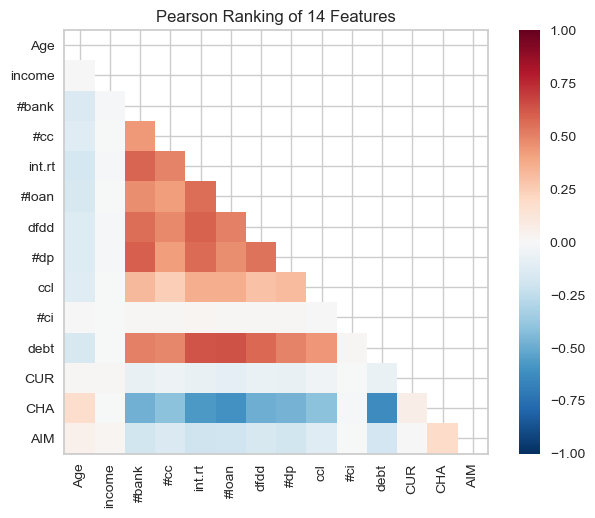

In [51]:
from yellowbrick.features import rank2d

visualizer = rank2d(X)

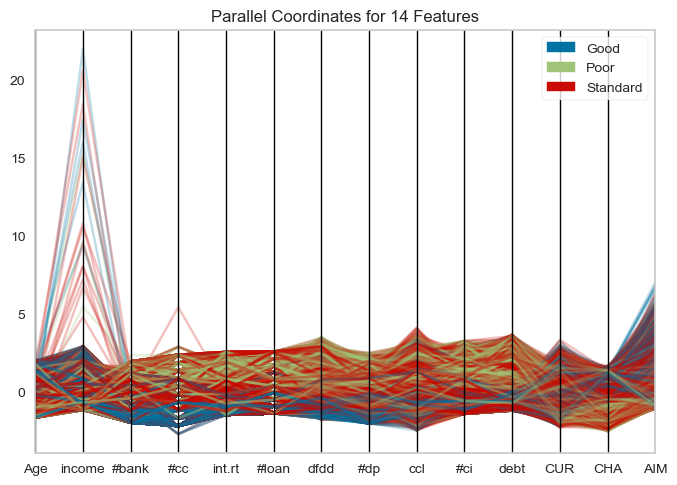

In [13]:
from yellowbrick.features import parallel_coordinates

visualizer = parallel_coordinates(X, y, normalize="standard")

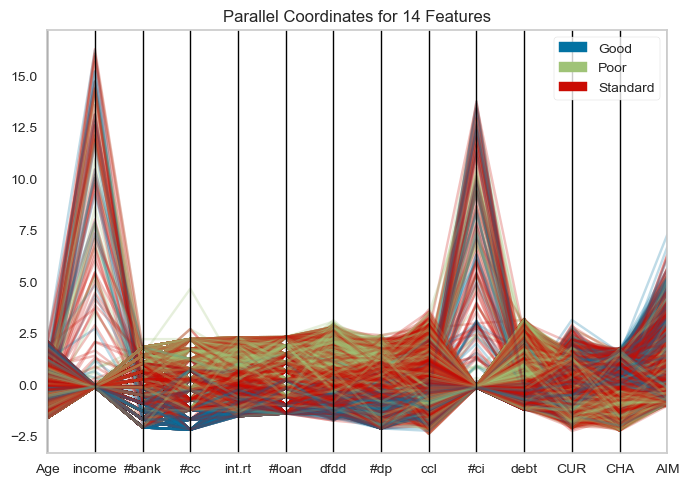

<Axes: title={'center': 'Parallel Coordinates for 14 Features'}>

In [25]:
# Specify the features of interest and the classes of the target

from yellowbrick.features import parallel_coordinates

# Instantiate the visualizer
visualizer = parallel_coordinates(X, y, normalize="standard", sample=0.2, shuffle=True)

# Fit the visualizer and display it
visualizer.fit_transform(X, y)
visualizer.show()

/Users/cashojo/anaconda3/envs/dev/lib/python3.10/site-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


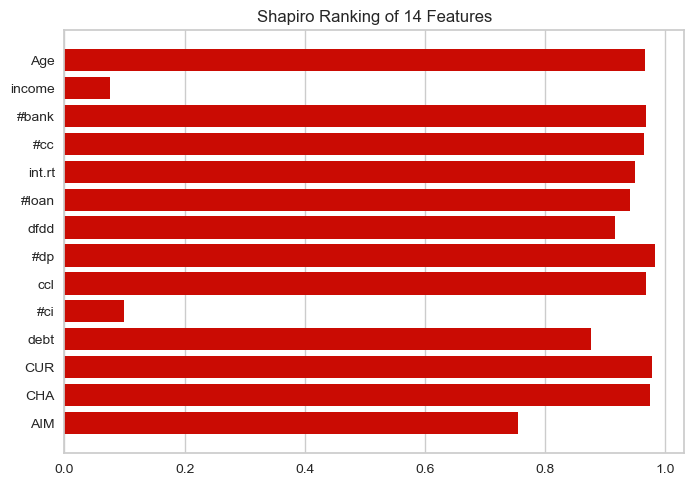

In [50]:
from yellowbrick.features import rank1d

visualizer = rank1d(X, color="r")

In [ ]:
from yellowbrick.classifier import discrimination_threshold
from sklearn.linear_model import LogisticRegression

visualizer = discrimination_threshold(
    LogisticRegression(multi_class="auto", solver="liblinear"), X, y
)


YellowbrickValueError: Target needs to be label encoded.

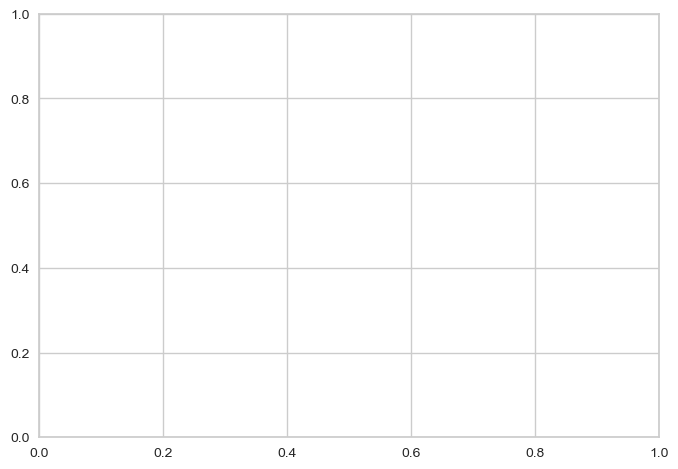

In [53]:
from yellowbrick.features import pca_decomposition

visualizer = pca_decomposition(X, y)

PCA

In [27]:
from sklearn.decomposition import PCA

pca = PCA(n_components=3)

In [28]:
# Create a df from the scaled data, take original column names
df_credit_scaled = pd.DataFrame(credit_data_df, columns=credit_data_df.columns)

# Set the coinid column as index
df_credit_scaled.index = credit_data_df.index

# Display sample data
df_credit_scaled.head()

,Age,income,#bank,#cc,int.rt,#loan,dfdd,#dp,ccl,#ci,debt,CUR,CHA,AIM,Credit_Score
0,23,19114.12,3,4,3,4,3,7,11.27,4,809.98,26.82,22.1,80.42,Good
1,23,19114.12,3,4,3,4,5,4,6.27,4,809.98,31.38,22.3,199.46,Good
2,23,19114.12,3,4,3,4,3,8,11.27,4,809.98,22.54,22.6,178.34,Good
3,28,34847.84,2,4,6,1,3,4,5.42,2,605.03,24.46,26.6,104.29,Standard
4,28,34847.84,2,4,6,1,7,1,7.42,2,605.03,38.55,26.7,40.39,Good


In [29]:
# Create a list with the number of k-values from 1 to 11
k = list(range(1, 12))
print(k)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]


In [34]:
from sklearn.cluster import KMeans
# Create an empty list to store the inertia values
inertia = []

# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using `df_market_data_scaled`
# 3. Append the model.inertia_ to the inertia list
for i in k:
    k_model = KMeans(n_clusters=i, random_state=1)
    k_model.fit(X)
    inertia.append(k_model.inertia_)

In [35]:
# Create a dictionary with the data to plot the Elbow curve
elbow_data = {"k": k, "inertia": inertia}

# Create a df with the data to plot the Elbow curve
df_elbow = pd.DataFrame(elbow_data)

In [37]:
import hvplot.pandas
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.
df_elbow.hvplot.line(
    x="k", 
    y="inertia", 
    title="Elbow Curve", 
    xticks=k
)

:Curve   [k]   (inertia)

In [38]:
# Initialize the K-Means model using the best value for k
model = KMeans(n_clusters=2, random_state=1)

# Print the model
model

KMeans(n_clusters=2, random_state=1)

In [40]:
# Fit the scaled data to the instance of the model
model.fit(X)

KMeans(n_clusters=2, random_state=1)

In [43]:
# Make predictions about the data clusters using the trained model
# Predict the clusters to group the cryptocurrencies using the scaled data
predictions = model.predict(X)

# Print the resulting array of cluster values
print(len(predictions))

49523


In [44]:
df_credit_predictions = X.copy()

In [46]:
# Add a new column to the DataFrame with the predicted clusters
df_credit_predictions['predicted_cluster'] = predictions

# Display sample data
df_credit_predictions

,Age,income,#bank,#cc,int.rt,#loan,dfdd,#dp,ccl,#ci,debt,CUR,CHA,AIM,predicted_cluster
0,23,19114.12,3,4,3,4,3,7,11.27,4,809.98,26.82,22.1,80.42,0
1,23,19114.12,3,4,3,4,5,4,6.27,4,809.98,31.38,22.3,199.46,0
2,23,19114.12,3,4,3,4,3,8,11.27,4,809.98,22.54,22.6,178.34,0
3,28,34847.84,2,4,6,1,3,4,5.42,2,605.03,24.46,26.6,104.29,0
4,28,34847.84,2,4,6,1,7,1,7.42,2,605.03,38.55,26.7,40.39,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49518,28,20002.88,10,8,29,5,33,25,18.31,9,3571.70,28.51,6.0,213.98,0
49519,29,20002.88,10,8,29,5,33,25,18.31,9,3571.70,37.14,6.2,34.66,0
49520,25,39628.99,4,6,7,2,20,6,9.50,3,502.38,39.32,31.4,140.58,0
49521,25,39628.99,4,6,7,2,23,7,11.50,3,502.38,34.66,31.5,60.97,0


In [47]:
# Use the PCA model with `fit_transform` to reduce to 3 principal components
pca_transformed = pca.fit_transform(df_credit_predictions)

# View the first 5 rows of the df
pca_transformed[:5]


# pca2 contains the transformed data after applying PCA with 3 principal components
# each row in the df represents an observation (a crypto) from the original dataset, transformed into the new lower-dimensional space spanned by the principal components
# the values in each column represent the coordinates of the transformed data points along the corresponding principal component axis
# these values indicate how much each observation contributes to that particular principal component

array([[-1.64239863e+05, -5.74477857e+02, -1.01508573e+01],
       [-1.64239863e+05, -5.78211783e+02, -2.08880918e+01],
       [-1.64239863e+05, -5.77540134e+02, -1.89831494e+01],
       [-1.48506142e+05, -7.80047421e+02, -1.33437846e+01],
       [-1.48506142e+05, -7.78025959e+02, -7.57760681e+00]])

In [48]:
# display the explained variance ratios - represents the proportion of variance explained by each principal component
explained_variance_ratio = pca.explained_variance_ratio_

print(explained_variance_ratio)

[9.99999369e-01 5.98798635e-07 1.63690252e-08]
